# **AgriSmart:Crop Prediction System Using Machine Learning Algorithms**


# **Project Objectives:**


---



# 📚 Table of Contents – Crop Prediction System

1. **Project Introduction & Objectives**  
   Introduces the goal of predicting the most suitable crop based on environmental and soil factors using machine learning models. Lists both the primary and specific objectives of the project.

2. **Dataset Description**  
   Details the meaning and importance of each feature in the dataset, such as N (Nitrogen), P (Phosphorus), K (Potassium), temperature, humidity, pH, rainfall, and the target crop label.

3. **Data Wrangling**  
   Covers basic inspection and understanding of the dataset using `.sample()`, `.size`, `.shape`, `.describe()`, and checks for missing values using `.isnull()`.

4. **Handling Missing Values**  
   Discusses strategies like filling (`fillna()`) or dropping (`dropna()`) missing values, if any exist in the dataset.

5. **Handling Outliers**  
   Identifies outliers using visualization techniques like boxplots and explains how to address them using capping or removal methods.

6. **Encoding Categorical Values**  
   Converts crop labels into numerical form using Label Encoding to prepare the data for machine learning models.

7. **Feature Scaling**  
   Standardizes or normalizes numerical features to bring them onto a common scale, improving model performance.

8. **Exploratory Data Analysis (EDA)**  
   Visual analysis using heatmaps, histograms, and scatterplots to understand the relationships between variables, detect patterns, and check correlations.

9. **Model Building**  
   Implements various classification models such as:
   - Decision Tree (with entropy)
   - Random Forest
   - Logistic Regression
   - K-Nearest Neighbors
   - Support Vector Machine
   - AdaBoost, XGBoost, and Gradient Boosting
    Evaluates each model performance using:
    - Accuracy
    - Confusion Matrix
    - Classification Report
    - ROC-AUC curves for multiclass classification



10. **Result Comparison**  
    Compares training and testing accuracy of all models in a single table, including total accuracy and highlights the best model.

11. **Conclusion**  
    Summarizes the project results, discusses the most effective algorithm, and its application in real-world crop recommendation systems.







# **1.Primary Objective:**




To develop a machine learning model that predicts the most suitable crop for cultivation based on environmental parameters such as N,P,K,temperature, humidity, pH, and rainfall.

# **2.Column	Description**:



**N (Nitrogen)**:The nitrogen content in the soil (in mg/kg or parts per million). Nitrogen is essential for plant growth, especially for leafy crops.

**P (Phosphorus)**:The phosphorus content in the soil. It helps in root development and flowering.

**K (Potassium)**	:The potassium content in the soil. It plays a role in overall plant health, including disease resistance and drought tolerance.

**temperature (°C)**:The ambient temperature (in degrees Celsius) of the region where the crop is to be grown. Different crops thrive at different temperature ranges.

**humidity (%)**:The relative humidity (in %) of the environment. It affects plant transpiration and water requirements.

**ph**:The acidity or alkalinity of the soil. Most crops grow well in soil with a pH between 6.0 and 7.5, but this varies.

**rainfall (mm)**:The annual or seasonal rainfall (in millimeters). Water availability is crucial for crop growth.

**label**:The target variable, usually the recommended crop name (e.g., rice, wheat, maize, etc.), based on the above conditions.


## **3.DATA WRANGLING**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the dataset using pandas
df=pd.read_csv("/content/Crop prediction.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


**-->The sample() function (especially in pandas and other libraries) is used to randomly select a subset of data from a larger dataset.**

In [ ]:
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2021,81,56.0,36.0,23.396057,72.605129,7.097586,174.787641,jute
1414,109,26.0,45.0,28.279737,90.389712,6.224535,21.589925,muskmelon
1253,8,139.0,199.0,29.369477,81.539964,6.336427,66.134428,grapes
1575,29,138.0,197.0,22.190554,92.437642,5.830892,121.662276,apple
168,71,35.0,24.0,22.273736,59.521932,5.826427,67.967048,maize
1635,0,12.0,7.0,20.184323,90.654585,6.969250,116.813097,orange
604,22,56.0,17.0,29.878881,87.327612,6.890780,44.752159,mungbean
1073,111,88.0,55.0,29.447954,78.349715,5.505394,96.450426,banana
2022,84,55.0,38.0,26.874839,79.787252,6.956683,173.101710,jute
1543,5,144.0,205.0,21.421772,92.626653,6.184923,102.804566,apple


**--> df.size is used to print total number of elements in the Dataset.**

In [ ]:
df.size

17600

**--> df.shape is used to print we know how many rows and columns are there in a dataset.**

In [ ]:
df.shape

(2200, 8)

**-->df.describe() gives a quick statistical summary (like count, mean, std, min, and quartiles) of the numeric columns in a DataFrame.**

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2184.000000,2176.000000,2176.000000,2154.000000,2162.000000,2172.000000
mean,50.551818,53.397894,48.391085,25.647846,71.386771,6.473245,102.822729
std,36.917334,33.098025,50.863090,5.075090,22.449069,0.776481,54.274888
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.776615,60.097577,5.976588,64.251016
50%,37.000000,51.000000,32.000000,25.636097,80.454379,6.430075,94.735907
75%,84.250000,68.000000,49.000000,28.578222,90.062410,6.925182,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().mean()

,0
N,0.000000
P,0.007273
K,0.010909
temperature,0.010909
humidity,0.020909
ph,0.017273
rainfall,0.012727
label,0.010455


**-->df.isnull().mean() is used to find the percentage (or proportion) of missing values in each column of a DataFrame.**

## **4.HANDLING NULL VALUES**

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(),inplace=True)

In [ ]:
df.isnull().mean()

,0
N,0.0
P,0.0
K,0.0
temperature,0.0
humidity,0.0
ph,0.0
rainfall,0.0
label,0.0


## **5.HANDLING OUTLIERS**

<Axes: >

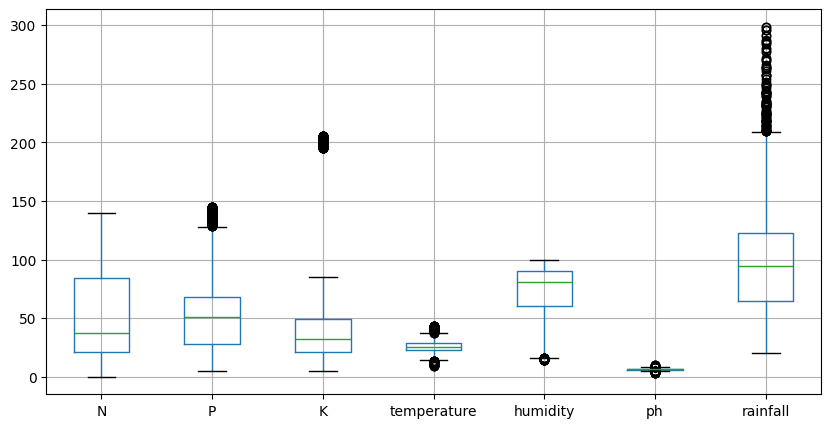

In [ ]:
plt.figure(figsize=(10,5))
df.select_dtypes(include='number').boxplot()

->A boxplot is used to detect outliers and understand the distribution of numerical data. It shows the minimum, first quartile (Q1), median, third quartile (Q3), and maximum, helping us identify any data points that lie significantly outside the normal range.



In [ ]:
for cols in df.select_dtypes(include='number').columns:
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.15*iqr
  upper_bound=q3+1.15*iqr
  df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)

->IQR (Interquartile Range) is a measure of statistical spread that shows the range where the middle 50% of the data lies.



In [ ]:
df['label'].value_counts() #22

,count
label,
apple,123
chickpea,100
pigeonpeas,100
kidneybeans,100
mungbean,100
mothbeans,100
watermelon,100
muskmelon,100
blackgram,100


### **6.DATA VISUALIZATION**

Heatmap of Feature Correlations

Shows relationships between features like N, P, K, pH, rainfall, etc.

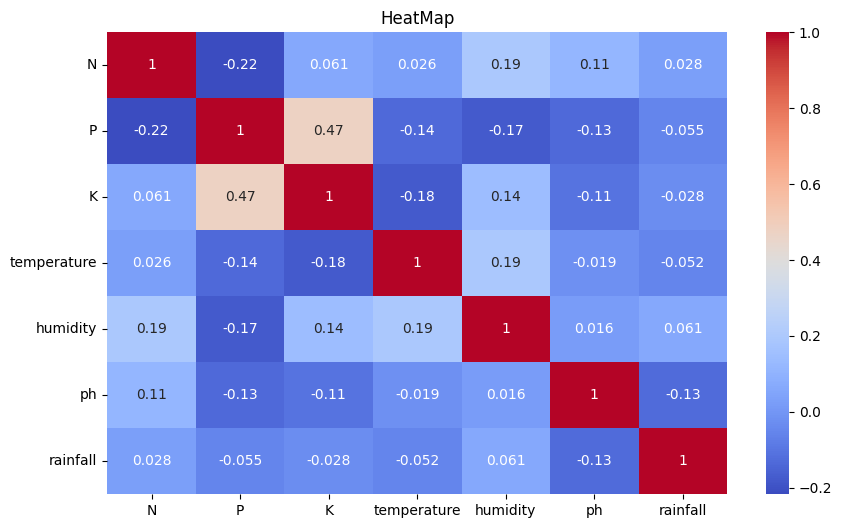

In [ ]:
num_df=df.select_dtypes(['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm")
plt.title('HeatMap')
plt.show()


--> P and K have a moderate positive correlation (0.47) has higher phosphorus is somewhat linked to higher potassium.

-->N has a weak negative correlation with P (-0.22) as nitrogen increases, phosphorus slightly decreases.

-->N has almost no correlation with K(0.06).

Boxplot for each column

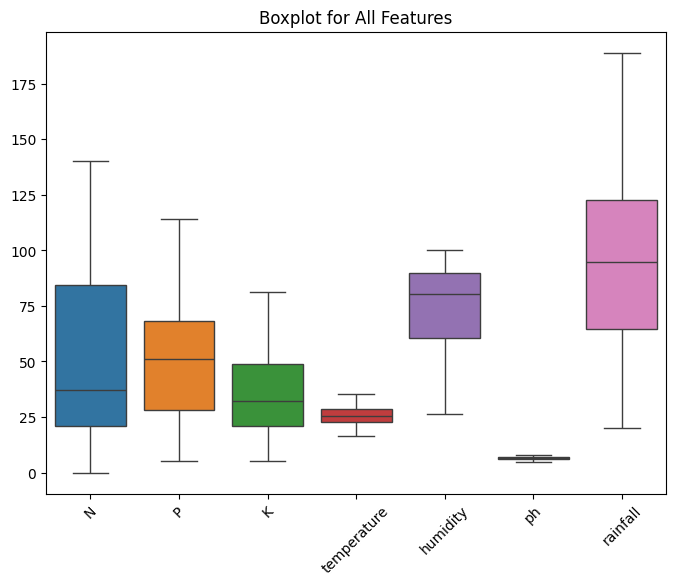

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=num_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.title('Boxplot for All Features')
plt.xticks(rotation=45)
plt.show()

->Features like temperature and pH → low variability → data points are close to each other.

-> Features like rainfall, N, P → high variability → values differ widely across samples.

-> Boxplot helps to visually identify outliers, spread, and central tendency (median) for each feature.


Countplot of Crop Labels

Shows how many samples each crop has.

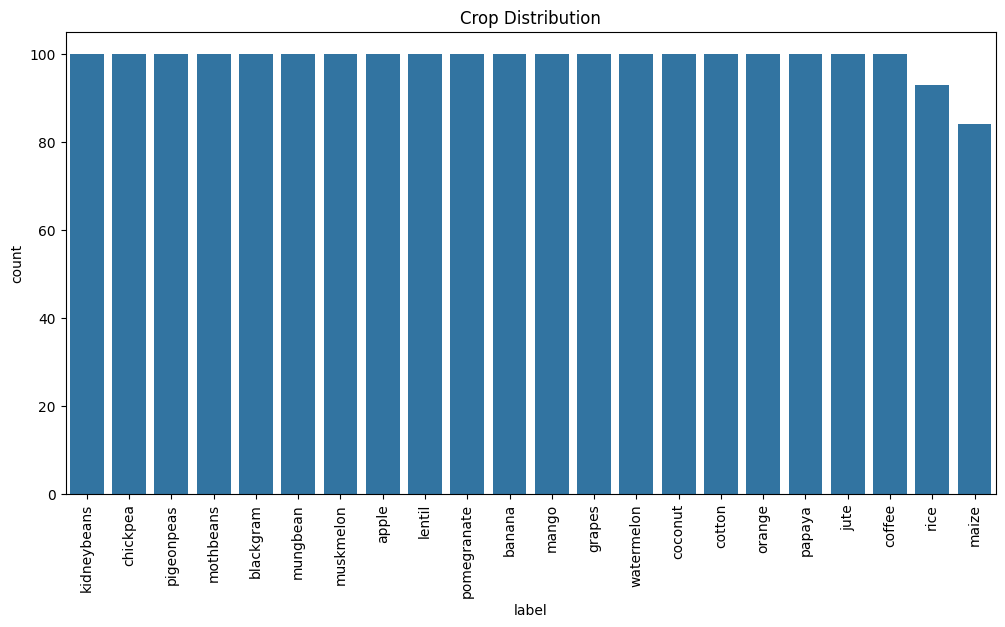

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=pd.read_csv("/content/Crop prediction.csv"), order=pd.read_csv("/content/Crop prediction.csv")['label'].value_counts().index)
plt.title('Crop Distribution')
plt.xticks(rotation=90)
plt.show()


->Frequency (number of samples) for each crop label.

->Maize and rice has less frequency.

Barplot for Average values


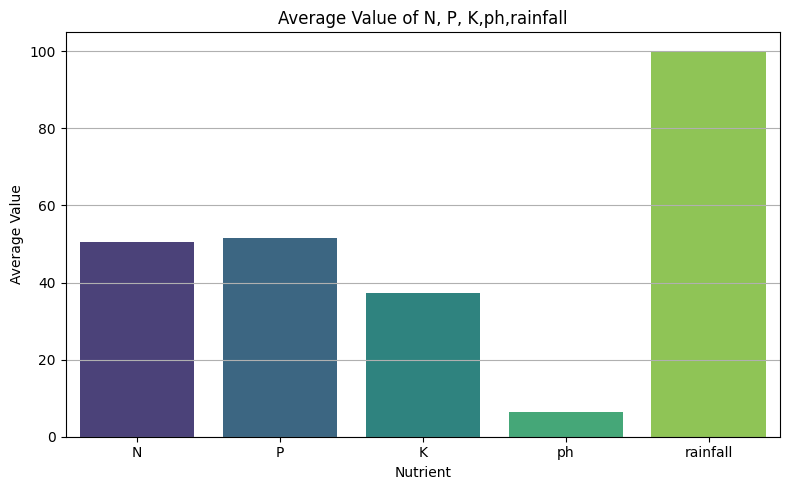

In [ ]:

npk_df = df[['N', 'P', 'K',"ph","rainfall"]]
npk_means = npk_df.mean().reset_index()
npk_means.columns = ['Nutrient', 'Average Value']
plt.figure(figsize=(8, 5))
sns.barplot(x='Nutrient', y='Average Value', data=npk_means, palette='viridis')
plt.title('Average Value of N, P, K,ph,rainfall')
plt.ylabel('Average Value')
plt.xlabel('Nutrient')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The rainfall contains high values compared to nitrogen and potassium.




In [ ]:
df.groupby("label")[["N", "P", "K"]].mean()

,N,P,K
label,,,
apple,31.495935,101.821138,72.479675
banana,100.230000,82.010000,50.050000
blackgram,40.020000,67.470000,19.240000
chickpea,40.090000,67.790000,79.032000
coconut,21.980000,16.930000,30.590000
coffee,101.200000,28.740000,29.940000
cotton,117.770000,46.240000,19.560000
grapes,23.180000,114.000000,81.200000
jute,78.400000,46.860000,39.990000


Barplot for N,P,K distribution for each label

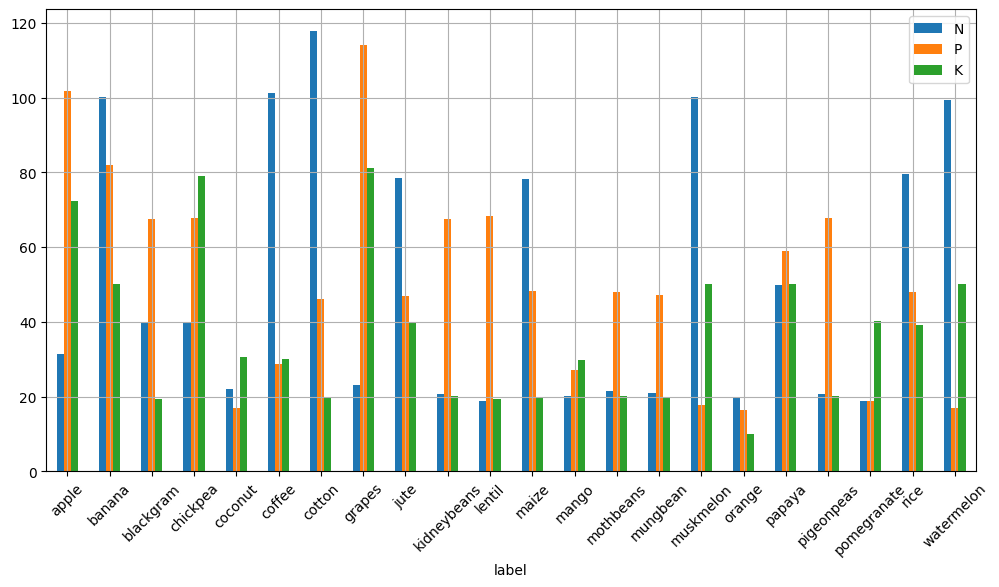

In [ ]:
df.groupby('label')[['N', 'P', 'K']].mean().plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.grid()
plt.show()

-->Cotton, coffee, banana,muskmelon,water melon require significantly higher nitrogen levels compared to other crops.

-->Grapes, apple, ,banana,chickpea, blackgram,kidneybeans,pigeonpeas and lentil show relatively higher phosphorus requirements.

-->chickpea, grapes, apple have noticeable potassium requirements.

-->Papaya,orange,mango show relatively balanced N, P, and K levels.






Joint plot for humidity,temperature and rainfall

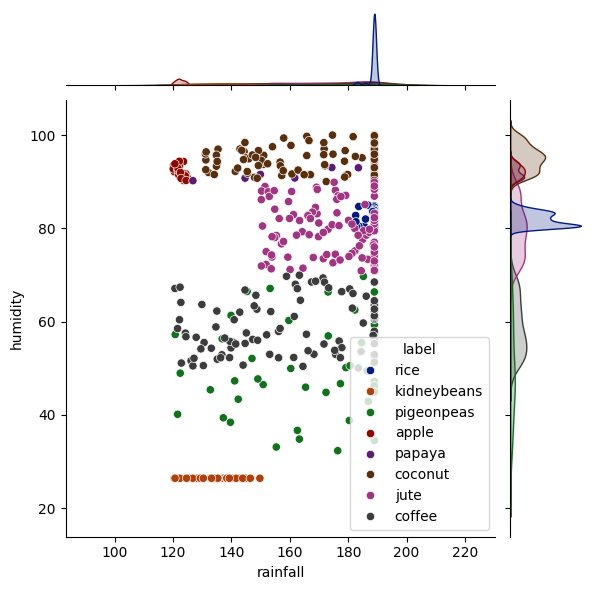

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label",palette="dark")

During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).
--> kidneybeabs grow in much  lower humidity than the others.

-->Rice,papaya,coconut,jute needs heavy rainfall and high humidity.

-->pigeonpeas and coffee has moderate variation.

Box plot comparing the label and ph

<Axes: xlabel='ph', ylabel='label'>

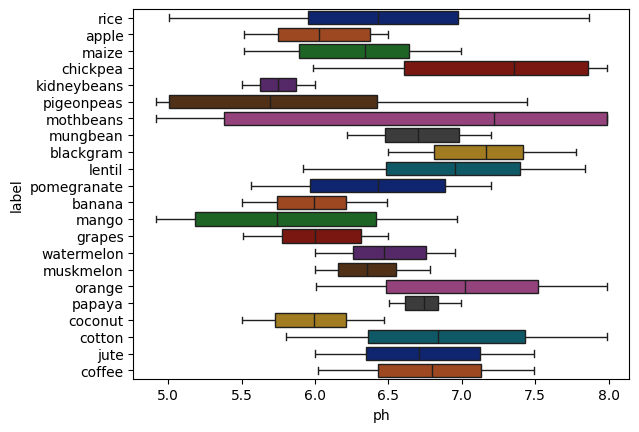

In [ ]:
sns.boxplot(y='label',x='ph',data=df,palette="dark")

-->The Ph value is preferred between 6 and 7.5 having good ph value which helps the soil agriculture.

-->pigeonpeas and mothbeans can grow in many types of soil whether it is low or high ph.


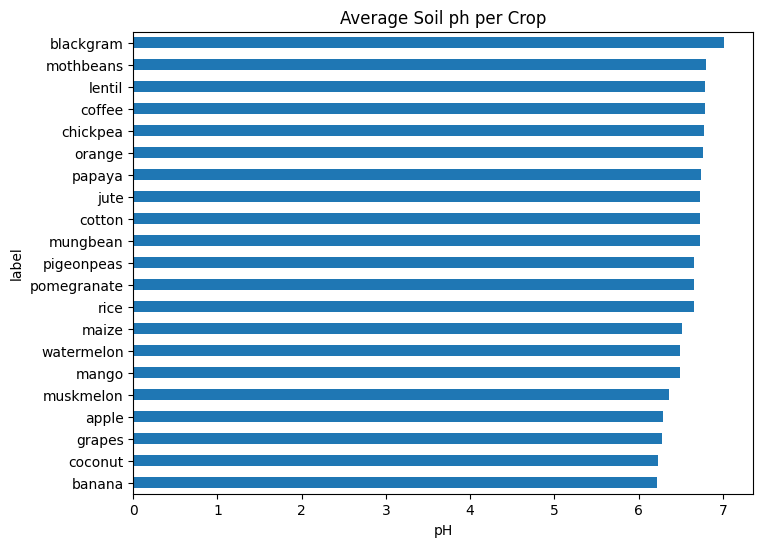

In [ ]:
df.loc[(df['ph'] >= 6) & (df['ph'] <= 7.5)].groupby("label")["ph"].mean().sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Average Soil ph per Crop")
plt.xlabel("pH")
plt.show()

**Blackgram has a near-perfect pH value, so it grows well under ideal soil conditions.**

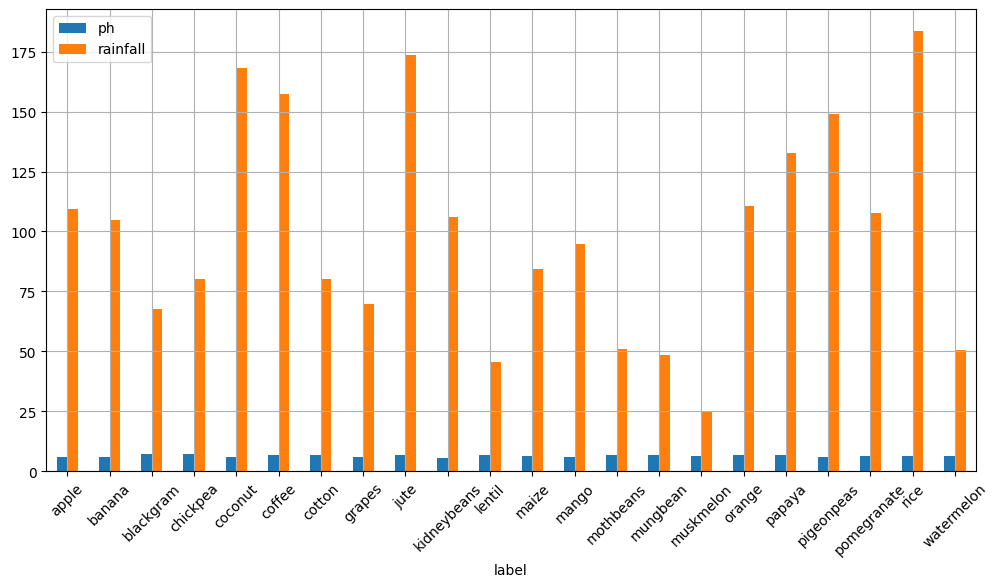

In [ ]:
df.groupby('label')[["ph","rainfall"]].mean().plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.grid()
plt.show()

-->It shows the rainfall is the most variability among all crops compared to ph.
-->rainfall plays a vital in for the crops.

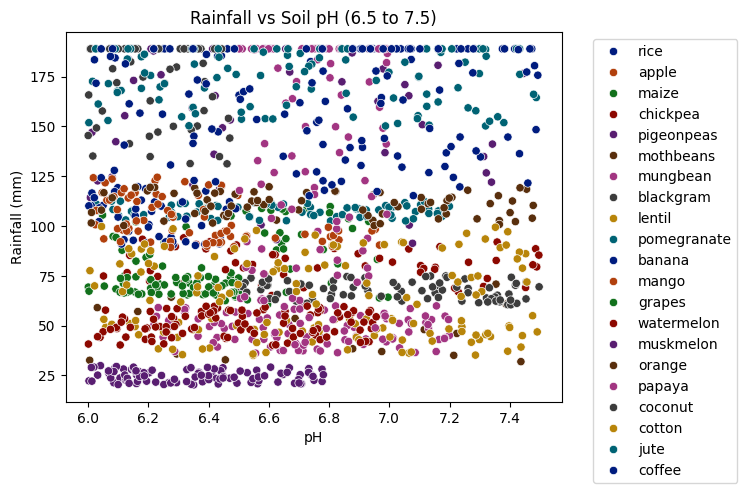

In [ ]:
sns.scatterplot(data=df.loc[(df['ph'] >= 6) & (df['ph'] <= 7.5)], x="ph", y="rainfall", hue="label",palette="dark")
plt.title("Rainfall vs Soil pH (6.5 to 7.5)")
plt.xlabel("pH")
plt.ylabel("Rainfall (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Crops grow well when soil pH is between 6.5 and 7.5.

-->Rainy-crops like rice, coconut, coffee, and jute appear at the top (need high rainfall).

-->Dryland crops like chickpea, cotton, pigeonpeas, and mothbeans appear at the bottom (need less water).

-->Crops like banana, papaya, grapes, and maize are spread in the middle, meaning they need moderate rainfall.

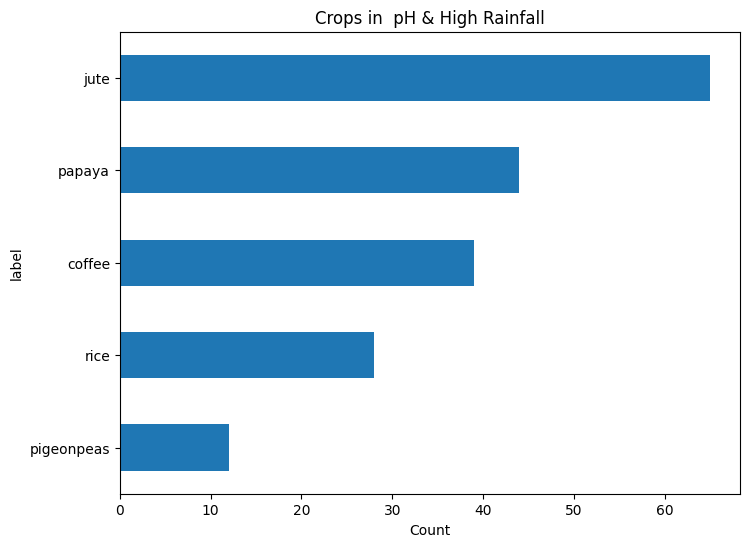

In [ ]:
filtered = df.loc[(df['ph'] >= 6.5) & (df['ph'] <= 7.5) & (df['rainfall'] > 150)]
crop_counts = filtered['label'].value_counts().sort_values()
crop_counts.plot(kind='barh', figsize=(8,6))
plt.title("Crops in  pH & High Rainfall")
plt.xlabel("Count")
plt.show()

**Jute appears in regions with high rainfall and lower pH, which might decrease the yielding of the crop.**

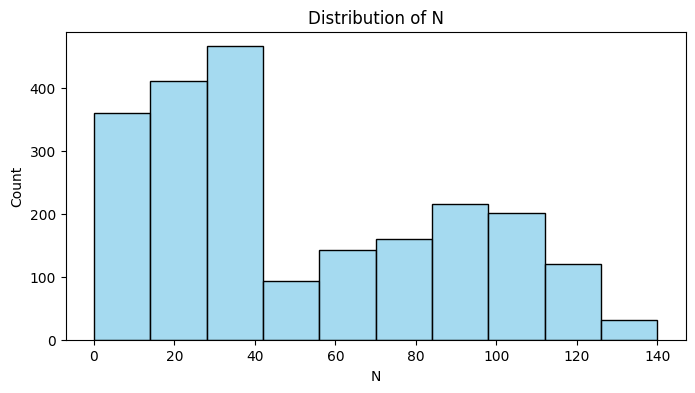

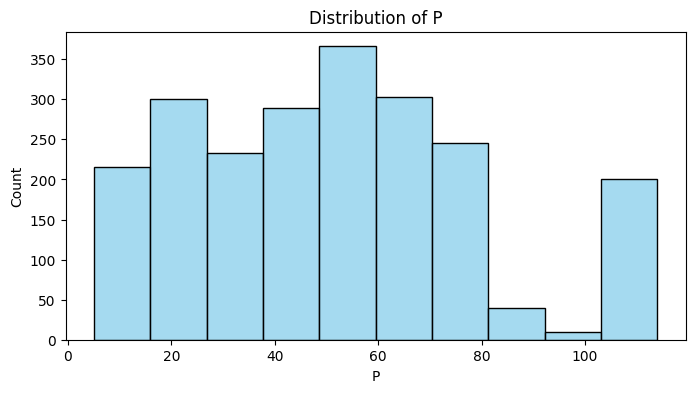

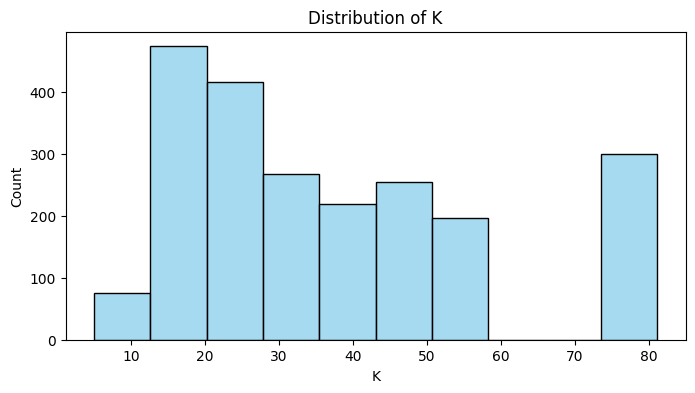

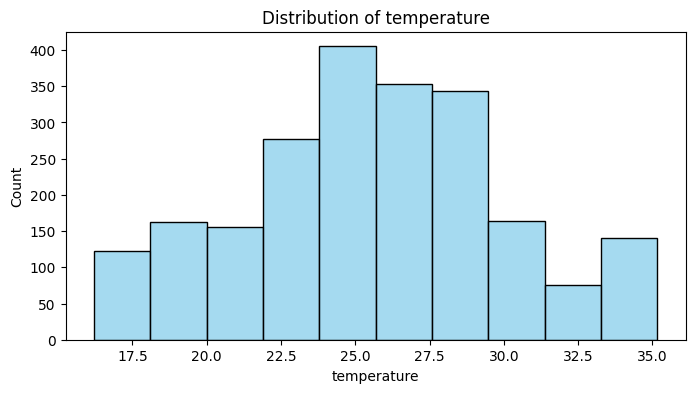

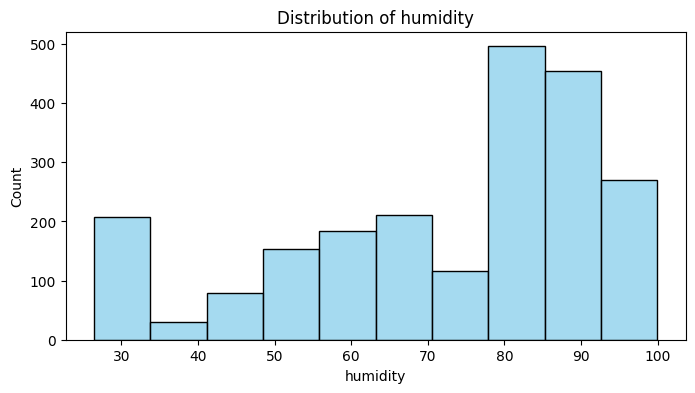

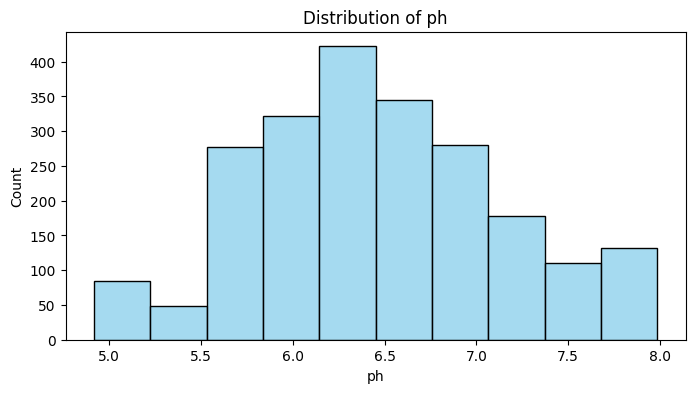

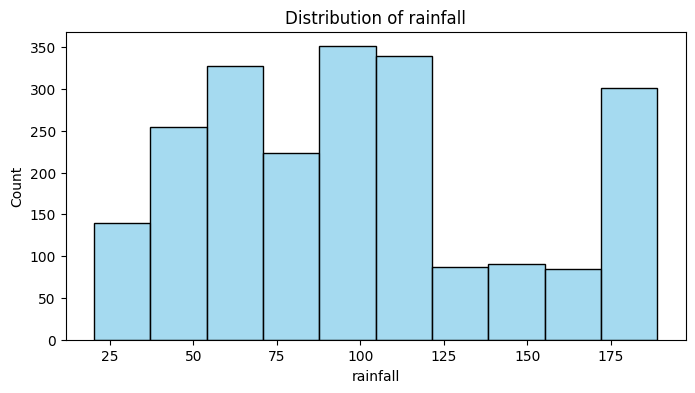

In [ ]:
for col in df.select_dtypes(['number']):
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=10, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


-->Nitrogen ranges from the 20 to 40.

-->P ranges from 40 to 50.

-->k ranges from 20 to 30.

-->temperature ranges from 25 to 30.

-->Humidity ranges from 80 to 90.

-->ph ranges from 6.5 to 7.0

-->rainfall ranges from 50 to 125.

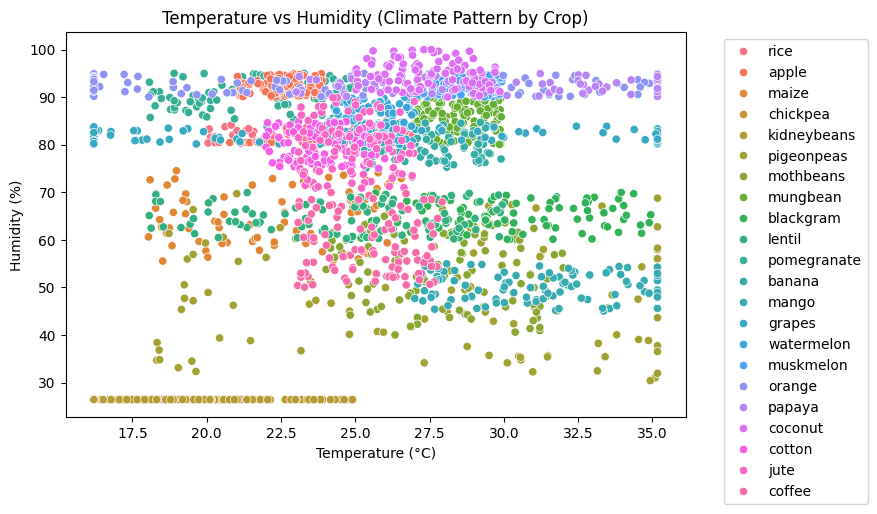

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="temperature", y="humidity", hue="label")
plt.title("Temperature vs Humidity (Climate Pattern by Crop)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


-->Most crops grow well within the temperature range of 22°C to 30°C and humidity levels between 80% to 90%, including rice, coconut, cotton, coffee, papaya, lentil, mungbean, blackgram, and mothbeans.

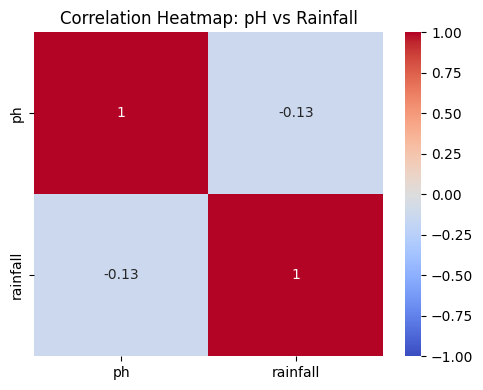

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['ph', 'rainfall']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: pH vs Rainfall')
plt.tight_layout()
plt.show()

-->The relation between ph and rainfall is very less.
(if it has the relation between them we can increase the crop yields.)

In [ ]:
#for col in ['N', 'P', 'K']:
    #plt.figure(figsize=(12, 5))
    #sns.swarmplot(data=df, x='label', y=col, size=3)
    #plt.xticks(rotation=90)
    #plt.title(f"{col} values for each Crop (Swarm Plot)")
    #plt.show()


-->

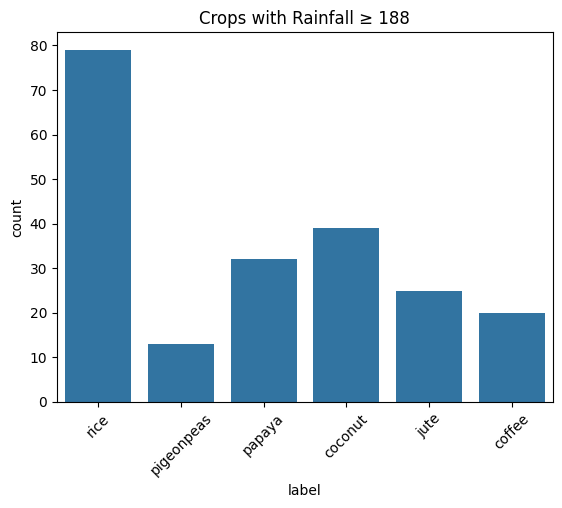

In [ ]:

sns.countplot(data=df[df["rainfall"] >= 188], x="label")
plt.xticks(rotation=45)
plt.title("Crops with Rainfall ≥ 188")
plt.show()


crops with rainfall having 188ml are grown by rice ,pigeonpeas, papaya,
coconut,jute,coffee among them the rice has highest growth

<Axes: xlabel='label', ylabel='count'>

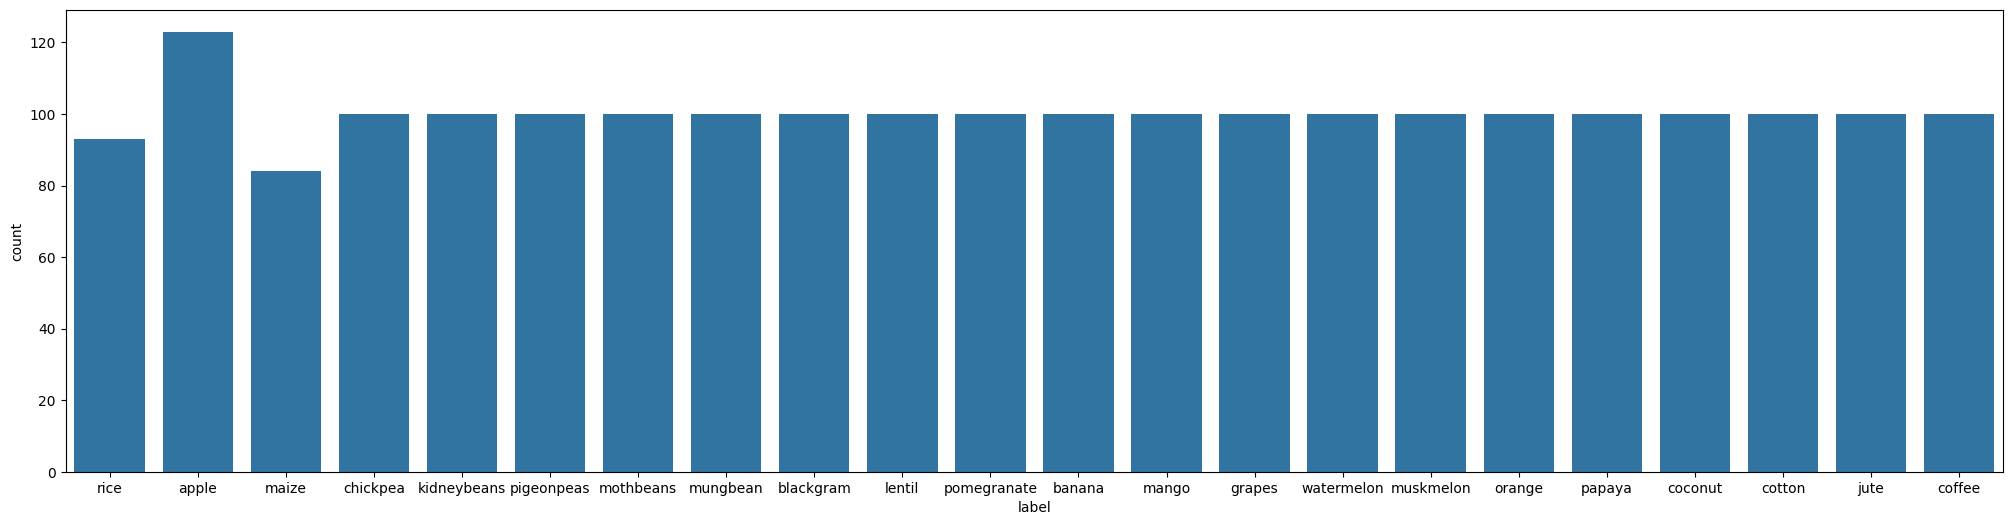

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot(x="label",data=df)


-->Among all the crops the apple has the highest yielding

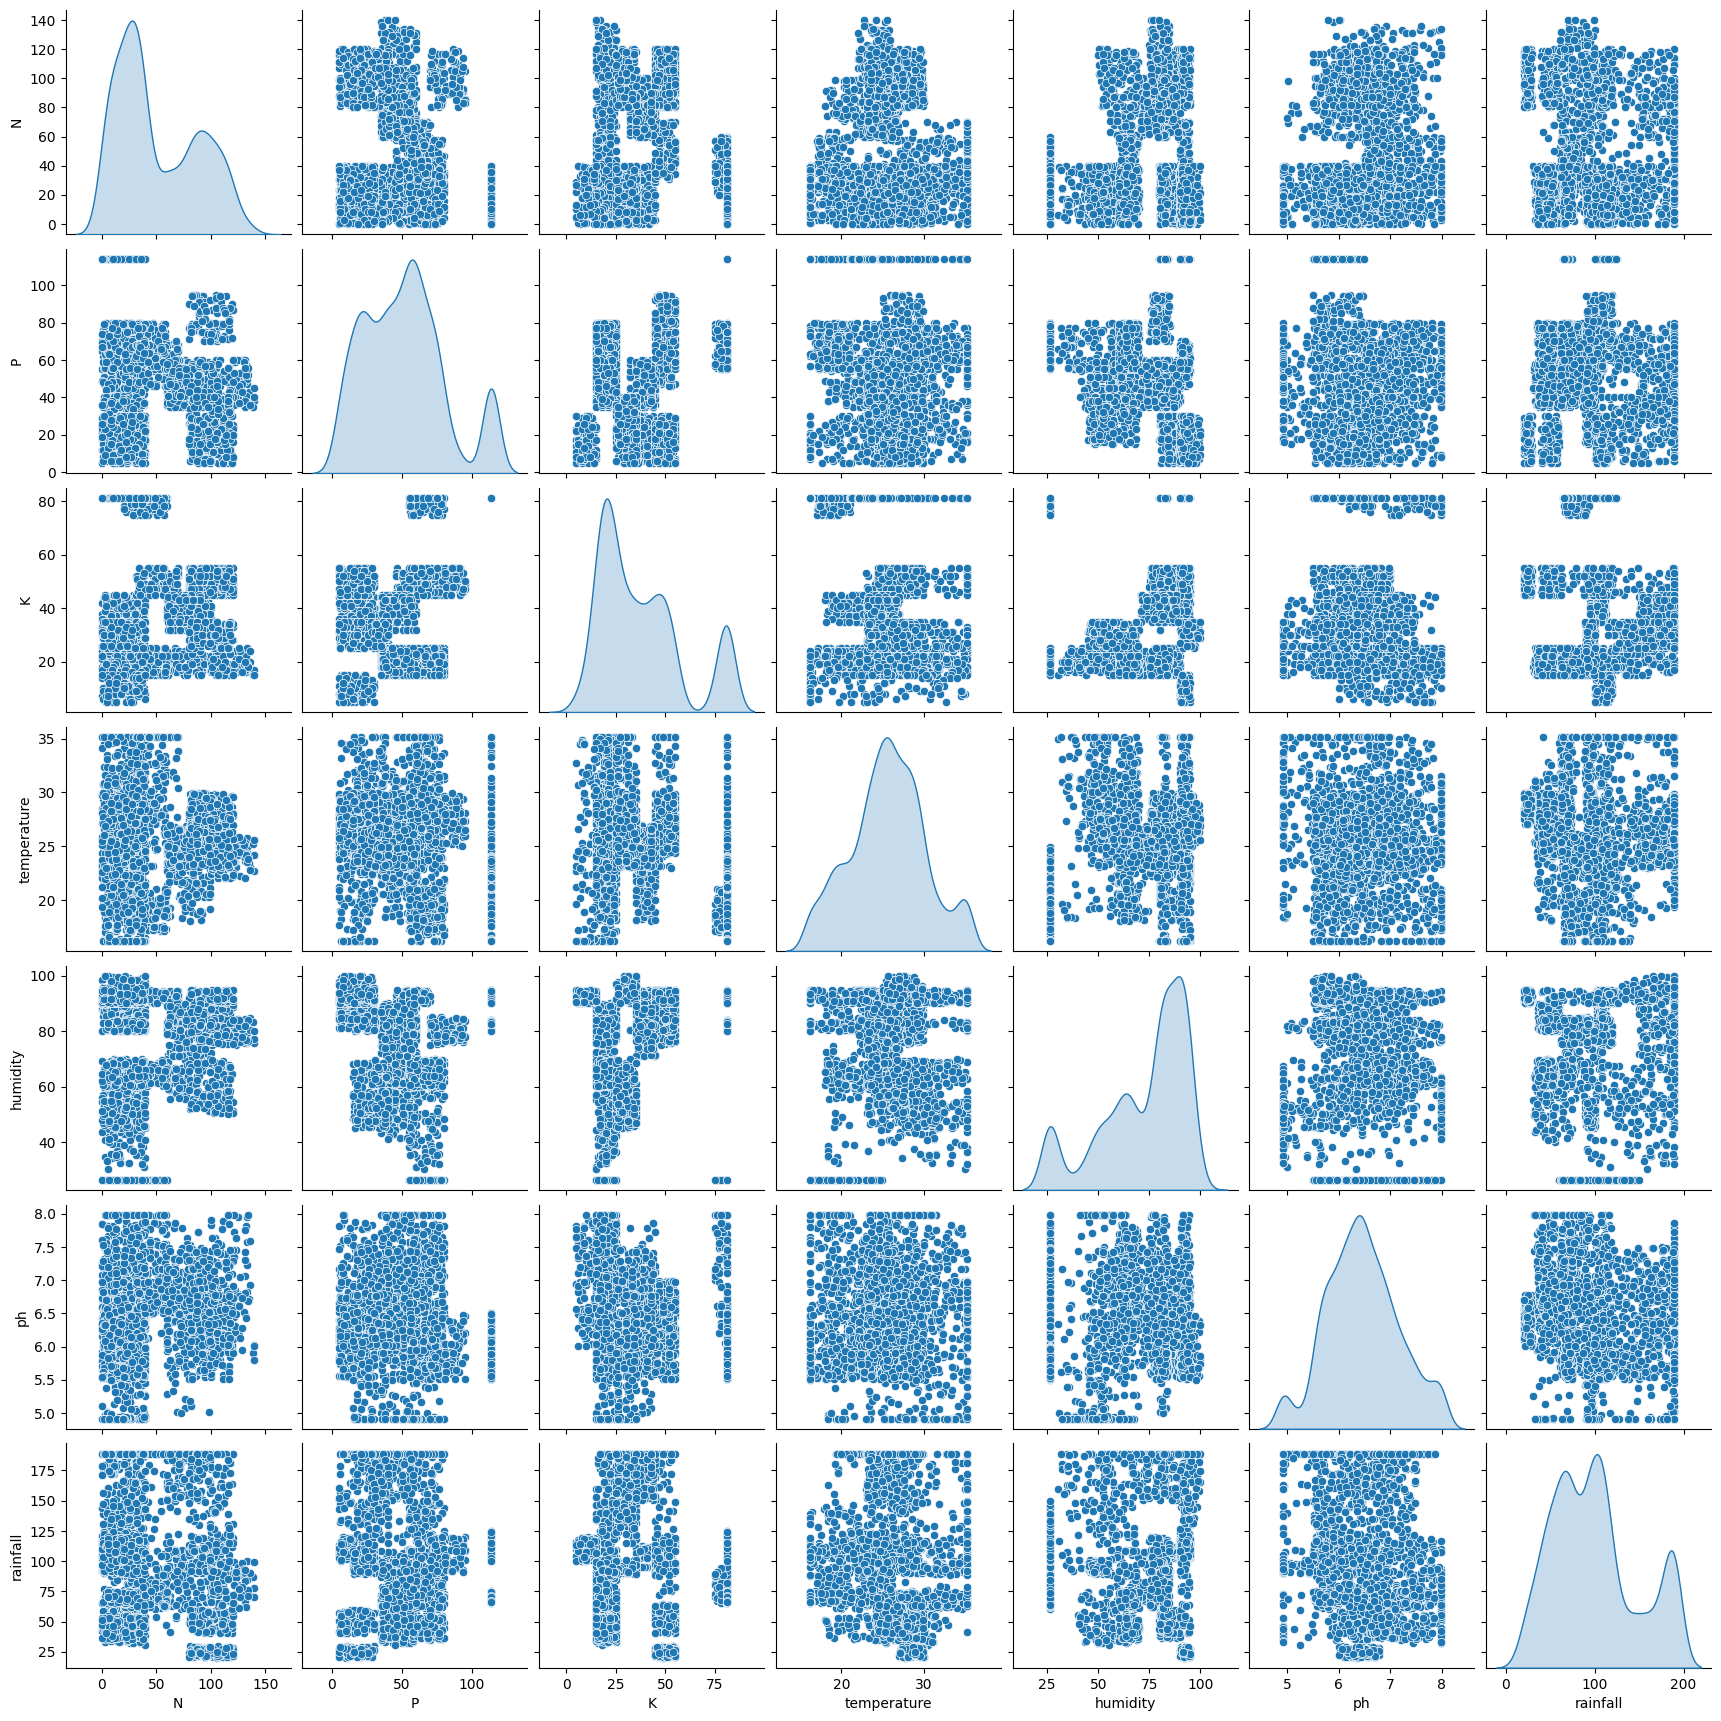

In [ ]:
sns.pairplot(df[['N','P','K','temperature','humidity','ph','rainfall']], diag_kind="kde")


-->The features in the dataset is not not strongly correlated with each other.Each feature contributes independently to crop recommendation.

In [ ]:
#sns.pairplot(df, hue="label", diag_kind="kde",palette="dark")

| Crop Type                            | Temperature           | Humidity      | K Level    | Rainfall    | N/P Usage         |
| ------------------------------------ | --------------------- | ------------- | ---------- | ----------- | ----------------- |
| **Fruits** (banana, coconut, papaya) | High or Low (depends) | High          | **High K** | High        | Varies            |
| **Grains** (rice, maize, wheat)      | Moderate              | Moderate–High | Medium     | Medium–High | **High N**        |
| **Legumes** (chickpea, lentil)       | Moderate              | **Low**       | **Low**    | **Low**     | **Low N**, High P |


In [ ]:
df["label"].unique()

array(['rice', 'apple', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

## **7.FEATURE ENGINEERING**

### **7.1.FEATURE SCALING**





In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,LabelEncoder
sd=StandardScaler()
mms=MinMaxScaler()
rs=RobustScaler()
le=LabelEncoder()

In [ ]:
df.skew(numeric_only=True)

,0
N,0.509721
P,0.540907
K,0.885825
temperature,0.022536
humidity,-0.921964
ph,0.136526
rainfall,0.496816


In [ ]:
#standardscaler----> n,temp,ph,rainfall
#minmaxscaler------> p
#robustscaler------> k,humidity
df[["N","temperature","ph","rainfall"]]=sd.fit_transform(df[["N","temperature","ph","rainfall"]])

In [ ]:
df[['P']] = mms.fit_transform(df[['P']])

In [ ]:
df[['K','humidity']] = rs.fit_transform(df[['K','humidity']])

In [ ]:
df[['rainfall']] = rs.fit_transform(df[['rainfall']])

In [ ]:
#Grouping Crops by Type: Cereal, Fruit, Pulse, Commercial
df['label'] = df['label'].map({'rice': 'cereal', 'maize': 'cereal', 'apple': 'fruit', 'banana': 'fruit', 'mango': 'fruit', 'grapes': 'fruit', 'watermelon': 'fruit', 'muskmelon': 'fruit', 'orange': 'fruit', 'papaya': 'fruit', 'pomegranate': 'fruit', 'coconut': 'fruit', 'chickpea': 'pulse', 'kidneybeans': 'pulse', 'pigeonpeas': 'pulse', 'mothbeans': 'pulse', 'mungbean': 'pulse', 'blackgram': 'pulse', 'lentil': 'pulse', 'cotton': 'commercial', 'jute': 'commercial', 'coffee': 'commercial'})

## **7.2.LABEL ENCODING**

In [ ]:
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

In [ ]:
df["label"].unique()

array([0, 2, 3, 1])

In [ ]:
#label_map = dict(zip(le.classes_, le.transform(le.classes_)))
#print(label_map)

# To see original labels back
#df['decoded_crop'] = le.inverse_transform(df['label'])

## **8.MODEL PREPARATION**

In [ ]:
X=df.drop(['label'],axis=1)
y=df['label']

# **Splitting Dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# **Null Accuracy**

In [ ]:
y_test.value_counts()
null_accuracy=(218/(218+130+53+39))
print('null accuracy :',format(null_accuracy))

null accuracy : 0.4954545454545455


## **9.MODEL PREDICTIONS**

# **1.LOGISTIC REGRESSION**

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
#test acc
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.8522727272727273


# **HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200,multi_class='auto',penalty='l2',class_weight='balanced',random_state=43,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)
lr.fit(X_train, y_train)
#test acc
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy (Logistic Regression):", accuracy_score(y_test,y_pred_lr))

Accuracy (Logistic Regression): 0.8522727272727273


| Parameter                | Simple Explanation                                                                |
| ------------------------ | --------------------------------------------------------------------------------- |
| **`max_iter=200`**       | Train the model up to 200 steps (iterations). Use more if it's not learning well. |
| **`multi_class='auto'`** | Let the model decide automatically how to handle multi-class problems.            |
| **`penalty='l2'`**       | Add some regularization (control overfitting) to keep the model simple.           |
| **`random_state=43`**    | Fixes randomness so you get the same results every time you run it.               |
| **`solver='liblinear'`** | A solver (algorithm) used to train the model; good for small datasets.            |
| **`tol=0.0001`**         | Stop training when the model’s improvement is very small (less than this).        |
| **`verbose=0`**          | Don’t print any messages while training.                                          |
| **`warm_start=False`**   | Start fresh every time you train (don’t reuse previous results).                  |


# **MODEL TESTING FOR LOGISTIC REGRESSION**

In [ ]:
train_acc = lr.score(X_train, y_train)
test_acc = lr.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.8631 (86.31%)
Testing Accuracy:  0.8182 (81.82%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8181818181818182
confusion matrix:
 [[ 14  20   0   5]
 [ 10  41   2   0]
 [  7   3 193  15]
 [  5   1  12 112]]
classification report:
               precision    recall  f1-score   support

           0       0.39      0.36      0.37        39
           1       0.63      0.77      0.69        53
           2       0.93      0.89      0.91       218
           3       0.85      0.86      0.85       130

    accuracy                           0.82       440
   macro avg       0.70      0.72      0.71       440
weighted avg       0.82      0.82      0.82       440



-->A confusion matrix is a table used to evaluate the performance of a classification model. It shows how well the model's predictions match the actual values.

| Metric        | What It Means (Simple)                                                      | Formula                                           |
| ------------- | --------------------------------------------------------------------------- | ------------------------------------------------- |
| **Precision** | Out of all predicted **positives**, how many were **actually correct**?     | `TP / (TP + FP)`                                  |
| **Recall**    | Out of all actual **positives**, how many did the model **correctly find**? | `TP / (TP + FN)`                                  |
| **F1 Score**  | A balance between **precision and recall**. Higher is better.               | `2 * (Precision * Recall) / (Precision + Recall)` |
| **Support**   | The **number of actual samples** in each class.                             | Just a count (no formula)                         |


# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=lr.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE IMPORTANCE**

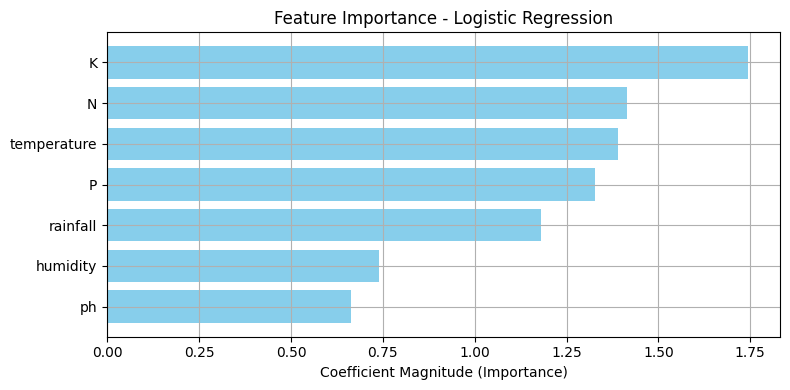

In [ ]:
importance = np.abs(lr.coef_[0])  # For binary classification

# Plot
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Magnitude (Importance)')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

-->Logistic regression consider the feature importance but not the same way as random forest.

-->The larger the magnitude of the weight (positive or negative), the more influence that feature has on the prediction.

-->Uses .coef_ (weights)

# **ROC-AUC Curve**

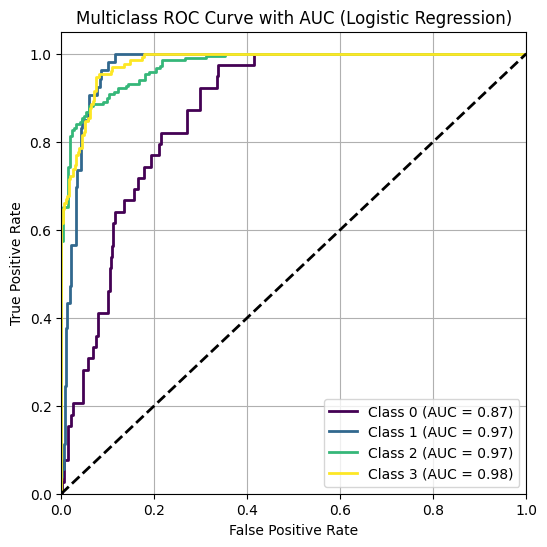

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities for each class from the logistic regression model
y_score = lr.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 6))  # Plot size set here
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i/n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot baseline (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (Logistic Regression)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **2.DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(  criterion='entropy',
    max_depth=5,
    splitter='best',
    random_state=45)
dt.fit(X_train,y_train)

#testing acc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


# **HYPER PARAMETER TUNING FOR DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',min_samples_split=4,min_samples_leaf=2,class_weight='balanced',max_features='sqrt',random_state=45)
dt.fit(X_train,y_train)

#testing acc

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9340909090909091


# **MODEL TESTING FOR DECISION TREE**

In [ ]:
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")


Training Accuracy: 0.9301 (93.01%)
Testing Accuracy:  0.9341 (93.41%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9340909090909091
confusion matrix:
 [[ 39   0   0   0]
 [ 19  34   0   0]
 [  7   2 209   0]
 [  0   0   1 129]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        39
           1       0.94      0.64      0.76        53
           2       1.00      0.96      0.98       218
           3       1.00      0.99      1.00       130

    accuracy                           0.93       440
   macro avg       0.88      0.90      0.87       440
weighted avg       0.96      0.93      0.94       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=dt.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE IMPORTANCE**

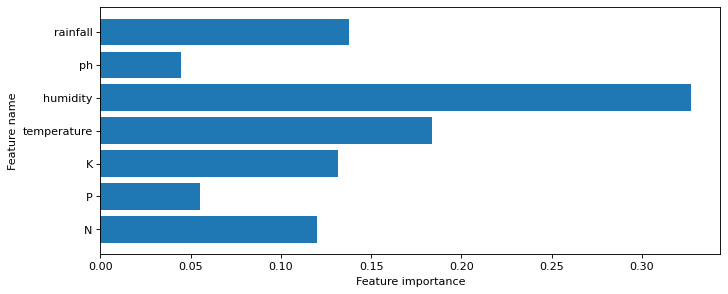

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dt.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

-->In Decision Tree the humidity is the important feature.

# **ROC-AUC Curve**

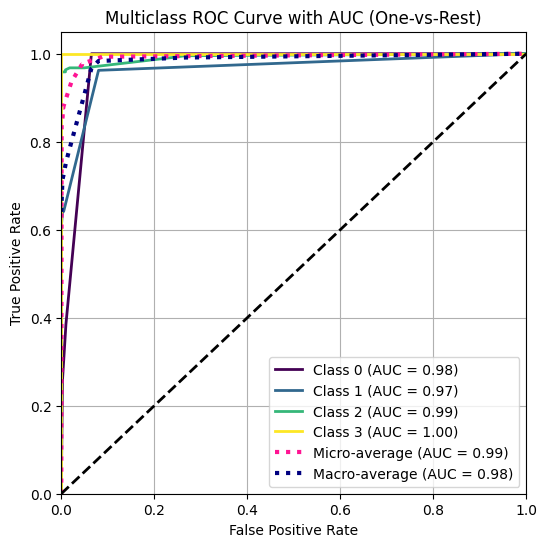

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Predict probabilities
y_score = dt.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6, 6))
colors = plt.cm.get_cmap('viridis', n_classes)

# Per-class ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors(i/n_classes),
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=3)

# Macro-average ROC
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average (AUC = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

# Plot base line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **3.RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_depth=5,random_state=34)
rf.fit(X_train,y_train)
#testing acc
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.975


# **HYPERPARAMETER TUNING FOR RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=50,min_samples_split=5,class_weight='balanced',max_features=None,ccp_alpha=0.0,random_state=32)
rf.fit(X_train,y_train)

#testing acc
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9272727272727272


# **MODEL TESTING**

In [ ]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9244 (92.44%)
Testing Accuracy:  0.9273 (92.73%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9704545454545455
confusion matrix:
 [[ 38   1   0   0]
 [  1  52   0   0]
 [ 11   0 207   0]
 [  0   0   0 130]]
classification report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        39
           1       0.98      0.98      0.98        53
           2       1.00      0.95      0.97       218
           3       1.00      1.00      1.00       130

    accuracy                           0.97       440
   macro avg       0.94      0.98      0.95       440
weighted avg       0.98      0.97      0.97       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=rf.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


## **FEATURE IMPORTANCE**

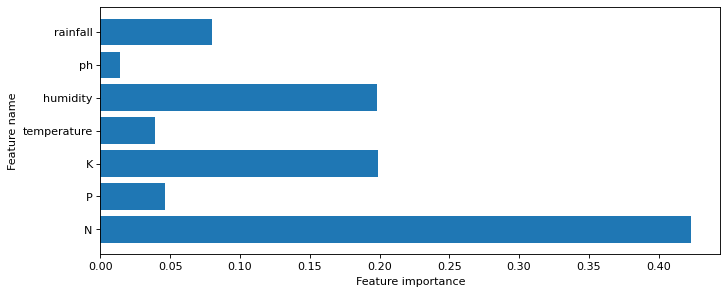

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

-->Nitrogen is considered as a feature importance by random forest.

# **ROC-AUC Curve**

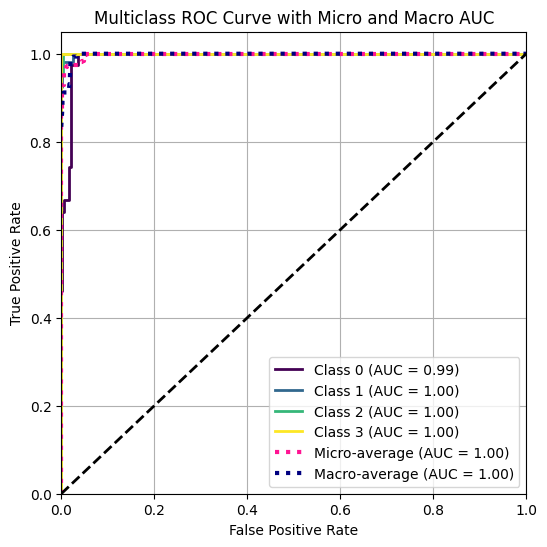

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the Random Forest model
y_score = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6, 6))
colors = plt.cm.get_cmap('viridis', n_classes)

# Plot individual class ROC curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors(i/n_classes),
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=3)

# Plot macro-average ROC
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average (AUC = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Micro and Macro AUC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **4.ADA BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=10)
ada.fit(X_train,y_train)
#test acc
y_pred = ada.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9681818181818181


# **HYPERPARAMETER TUNING FOR ADA BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
ada = AdaBoostClassifier(n_estimators=55,learning_rate=1.0,algorithm='SAMME',random_state=14)
from sklearn.metrics import accuracy_score
ada.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9386363636363636


# **MODEL TESTING**

In [ ]:
train_acc = ada.score(X_train, y_train)
test_acc = ada.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9352 (93.52%)
Testing Accuracy:  0.9386 (93.86%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9386363636363636
confusion matrix:
 [[ 38   1   0   0]
 [  9  44   0   0]
 [  5   2 201  10]
 [  0   0   0 130]]
classification report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.84        39
           1       0.94      0.83      0.88        53
           2       1.00      0.92      0.96       218
           3       0.93      1.00      0.96       130

    accuracy                           0.94       440
   macro avg       0.90      0.93      0.91       440
weighted avg       0.95      0.94      0.94       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=ada.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE IMPORTANCE**

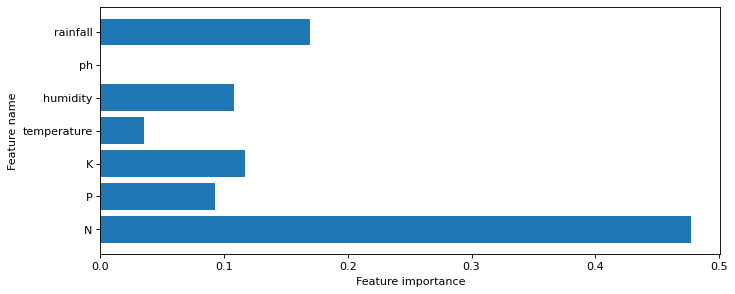

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), ada.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

-->Ada boost can consider the nitrogen as a feature imporatance.

# **ROC-AUC Curve**

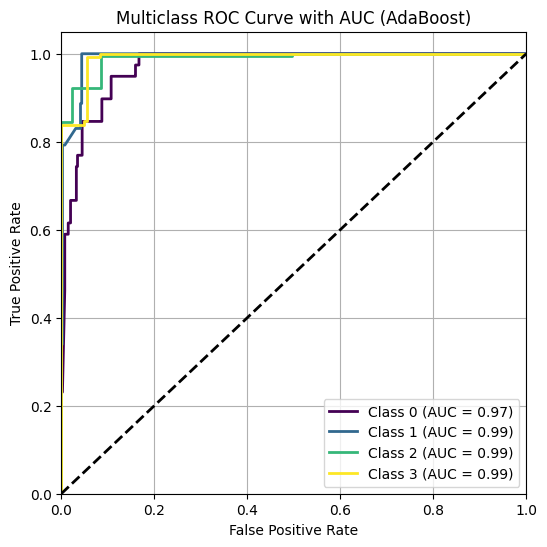

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the AdaBoost model
y_score = ada.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 6))  # Set plot size
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (AdaBoost)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **5.XG BOOSTING**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=44)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9863636363636363


# **HYPERPARAMETER TUNING FOR XG BOOSTING**

In [ ]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb = XGBClassifier(n_estimators=40,learning_rate=0.0001,max_depth=3,min_child_weight=4,subsample=0.3,random_state=44,eval_metric='merror')
xgb.fit(X_train, y_train, sample_weight=sample_weights)

from sklearn.metrics import accuracy_score

y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9363636363636364


# **MODEL TESTING**

In [ ]:
train_acc = xgb.score(X_train, y_train)
test_acc = xgb.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9437 (94.38%)
Testing Accuracy:  0.9364 (93.64%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9363636363636364
confusion matrix:
 [[ 39   0   0   0]
 [  5  48   0   0]
 [  8   0 195  15]
 [  0   0   0 130]]
classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.91      0.95        53
           2       1.00      0.89      0.94       218
           3       0.90      1.00      0.95       130

    accuracy                           0.94       440
   macro avg       0.91      0.95      0.92       440
weighted avg       0.95      0.94      0.94       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=xgb.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE TESTING**




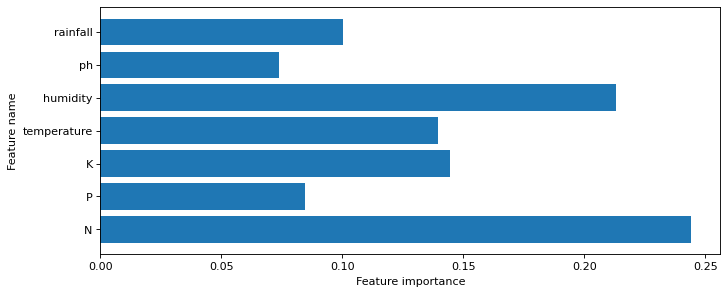

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), xgb.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

-->XG Boost consider the nitrogen as a feature importance.

# **ROC-AUC Curve**

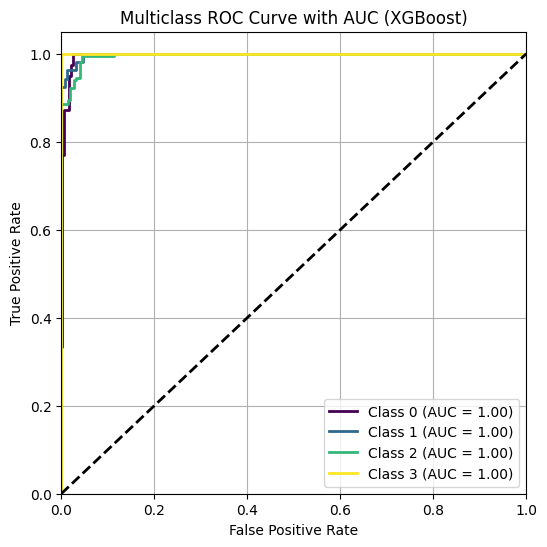

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the XGBoost model
y_score = xgb.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 6))  # Plot size set to 6x6
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (XGBoost)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **6.GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(X_train,y_train)
#test acc
y_pred = gbc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9931818181818182


# **HYPERPARAMETER TUNING FOR GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gbc=GradientBoostingClassifier(random_state=10,n_estimators=60, learning_rate=0.01 , max_depth=3, min_samples_split=4,min_samples_leaf=4)
gbc.fit(X_train,y_train)
#test acc
y_pred = gbc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.95


In [ ]:
import pickle
def clean_random_state(obj):

    if hasattr(obj, 'random_state_'):
        try:
            del obj.random_state_
        except:
            pass
    if hasattr(obj, 'estimators_'):
        for est in obj.estimators_:
            clean_random_state(est)

clean_random_state(gbc)

# Step 3: Save with pickle
with open("gbc_model_clean.pkl", "wb") as f:
    pickle.dump(gbc, f, protocol=4)

# Step 4: Download
from google.colab import files
files.download("gbc_model_clean.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL TESTING**

In [ ]:
train_acc = gbc.score(X_train, y_train)
test_acc = gbc.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9517 (95.17%)
Testing Accuracy:  0.9500 (95.00%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification report:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.95
classification report:
 [[ 23   9   3   4]
 [  1  47   5   0]
 [  0   0 218   0]
 [  0   0   0 130]]
classification report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73        39
           1       0.84      0.89      0.86        53
           2       0.96      1.00      0.98       218
           3       0.97      1.00      0.98       130

    accuracy                           0.95       440
   macro avg       0.93      0.87      0.89       440
weighted avg       0.95      0.95      0.95       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=gbc.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE IMPORTANCE**

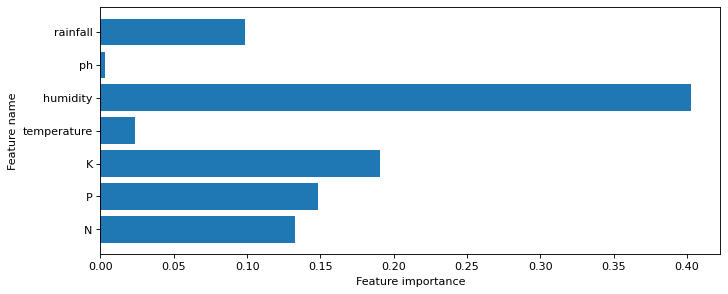

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), gbc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

-->Gradient Boosting consider the humidity as a important Feature.

# **ROC-AUC Curve**

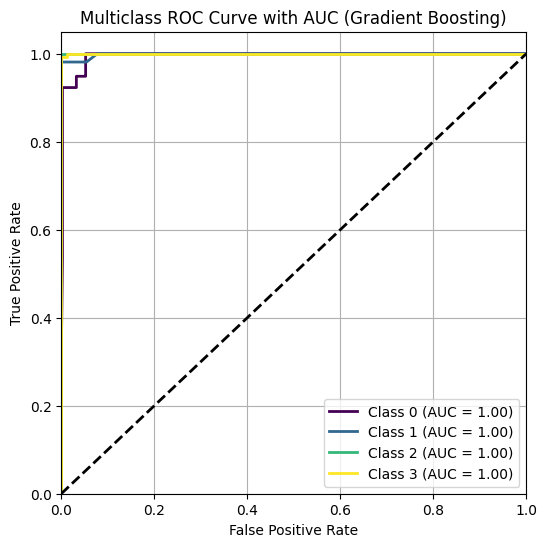

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the Gradient Boosting model
y_score = gbc.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 6))  # Set plot size
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (Gradient Boosting)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **7.K-NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#test acc
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9636363636363636


# **HYPERPARAMETER TUNING FOR KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto',  metric='euclidean', metric_params=None, n_jobs=None)
knn.fit(X_train,y_train)
#test acc
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9522727272727273


# **MODEL TESTING**

In [ ]:
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9773 (97.73%)
Testing Accuracy:  0.9523 (95.23%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification report:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9522727272727273
classification report:
 [[ 26  12   1   0]
 [  0  53   0   0]
 [  0   1 217   0]
 [  0   0   7 123]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        39
           1       0.80      1.00      0.89        53
           2       0.96      1.00      0.98       218
           3       1.00      0.95      0.97       130

    accuracy                           0.95       440
   macro avg       0.94      0.90      0.91       440
weighted avg       0.96      0.95      0.95       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=knn.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


-->K-Nearest Neighbors (KNN) does not use feature importance-instead, it stores the entire training data and makes predictions at runtime.

# **ROC-AUC Curve**

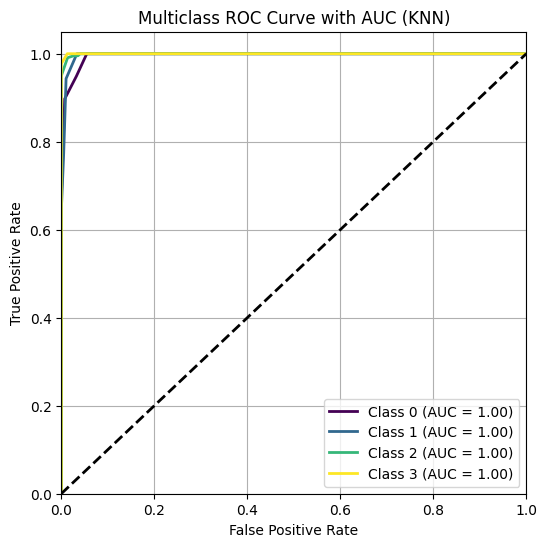

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the KNN model
y_score = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 6))  # Set plot size to 6x6
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (KNN)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### **8.SVM(SUPPORT VECTOR MACHINE)**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
#test acc
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9568181818181818


# **HYPARAMETER TUNING FOR SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='poly', gamma='scale', class_weight='balanced', probability=True,  random_state=42)
svm.fit(X_train, y_train)
#test acc
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9477272727272728


# **MODEL TESTING**

In [ ]:
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

Training Accuracy: 0.9563 (95.62%)
Testing Accuracy:  0.9477 (94.77%)


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification report:\n",confusion_matrix(y_test, y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9477272727272728
classification report:
 [[ 31   6   2   0]
 [ 12  41   0   0]
 [  1   0 217   0]
 [  0   0   2 128]]
classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.75        39
           1       0.87      0.77      0.82        53
           2       0.98      1.00      0.99       218
           3       1.00      0.98      0.99       130

    accuracy                           0.95       440
   macro avg       0.89      0.89      0.89       440
weighted avg       0.95      0.95      0.95       440



# **SAMPLE TESTING**

In [ ]:
sample = [-0.255888,	0.587982,	-0.545714	,1.925945,	-0.507910,	1.851722	,-0.450507]
prediction=svm.predict([sample])
print("The recommended crop is:",prediction)

The recommended crop is: [3]


# **FEATURE IMPORTANCE**

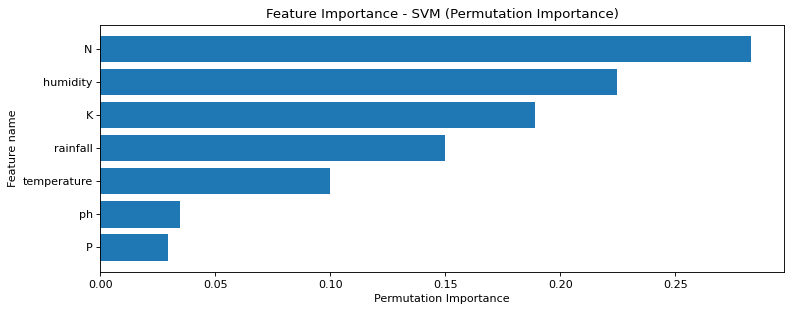

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(svm, X_test, y_test, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 4), dpi=80)
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature name")
plt.title("Feature Importance - SVM (Permutation Importance)")
plt.tight_layout()
plt.show()

-> Nitrogen is the important feature.

# **ROC-AUC Curve**

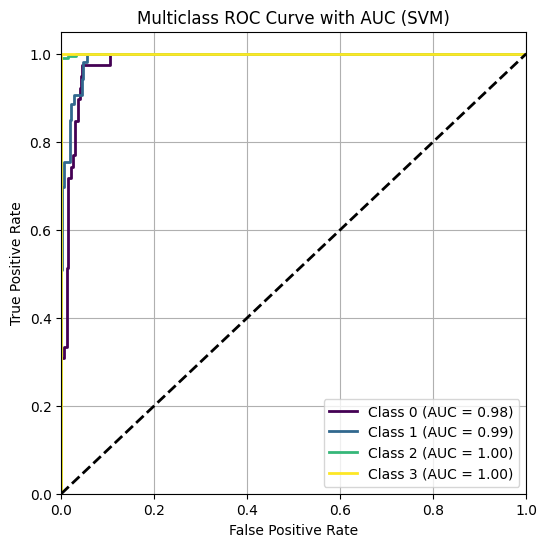

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Get predicted probabilities from the SVM model
y_score = svm.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 6))  # Set plot size to 6x6
colors = plt.cm.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with AUC (SVM)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Group the data to predict based on these range of values.
df.groupby('label').agg({
    'N': ['min', 'max'],
    'P': ['min', 'max'],
    'K': ['min', 'max'],
    'temperature': ['min', 'max'],
    'humidity': ['min', 'max'],
    'ph': ['min', 'max'],
    'rainfall': ['min', 'max']
})


N                   P                   K               temperature            humidity               ph               rainfall          
         min       max       min       max       min       max        min        max       min       max       min       max       min       max   
label                                                                                                                                              
0      0.255986  1.339734  0.275229  0.504587 -0.607143  0.464286  -1.682728   0.294809 -0.843347  0.152768 -2.110908  2.027312 -0.589143  1.628511
1      0.255986  2.423483  0.091743  0.504587 -0.607143  0.464286  -0.801880   0.515921 -1.028972  0.319318 -0.960801  2.197847 -0.589107  1.628511
2     -1.369636  1.881609  0.000000  1.000000 -0.964286  1.757143  -2.092441   2.128938 -1.198947  0.660771 -2.239388  2.197847 -1.288154  1.628511
3     -1.369636  0.255986  0.275229  0.688073 -0.607143  1.757143  -2.092441   2.128938 -1.828729  0.322874 -2.239388  2.197847 -1.103051  1.628511

# **10.CROSS VALIDATION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# For multiclass classification with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
# 5-fold cross-validation (you can change cv= to any number)
scores = cross_val_score(model, X, y, cv=6, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-validation scores: [0.37874659 0.70299728 0.92643052 0.97275204 0.97814208 0.99453552]
Mean Accuracy: 0.8256006710243544


# **11.OVERALL ACCURACIES**

In [ ]:
import pandas as pd

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')  # optional for alignment

# Your data
data = {
    "Sl.NO": [1, 2, 3, 4, 5, 6, 7, 8],
    "MODEL NAME": [
        "Logistic Regression", "Decision Tree", "Random Forest", "Ada Boosting",
        "XG Boosting", "Gradient Boosting", "K-Nearest Neighbors", "Support Vector Machine"
    ],
    "TRAINING ACCURACY": [0.863, 0.9301, 0.9244, 0.9352, 0.9437, 0.9517, 0.9773, 0.9563],
    "TESTING ACCURACY": [0.818, 0.9341, 0.9273, 0.9386, 0.9364, 0.9500, 0.9523, 0.9477],
    "TOTAL ACCURACY": [0.85, 0.93, 0.92, 0.92, 0.93, 0.95, 0.95, 0.94]
}

df1 = pd.DataFrame(data)
print(df1)

   Sl.NO        MODEL NAME        TRAINING ACCURACY  TESTING ACCURACY  TOTAL ACCURACY
0    1       Logistic Regression       0.8630             0.8180            0.85     
1    2             Decision Tree       0.9301             0.9341            0.93     
2    3             Random Forest       0.9244             0.9273            0.92     
3    4              Ada Boosting       0.9352             0.9386            0.92     
4    5               XG Boosting       0.9437             0.9364            0.93     
5    6         Gradient Boosting       0.9517             0.9500            0.95     
6    7       K-Nearest Neighbors       0.9773             0.9523            0.95     
7    8    Support Vector Machine       0.9563             0.9477            0.94     


# **Loss Entropy**

In [ ]:
from sklearn.metrics import log_loss

# Example for one model (Logistic Regression):
y_prob = lr.predict_proba(X_test)   # predicted probabilities
loss = log_loss(y_test, y_prob)        # cross-entropy loss
print("Cross-Entropy Loss:", loss)


from sklearn.metrics import log_loss

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Ada Boost": ada,
    "XGBoost": xgb,
    "Gradient Boost": gbc,
    "KNN": knn,
    "SVM": svm  # If using probability outputs
}

for name, model in models.items():
    try:
        y_prob = model.predict_proba(X_test)
        ce_loss = log_loss(y_test, y_prob)
        print(f"{name} - Cross Entropy Loss: {ce_loss:.4f}")
    except Exception as e:
        print(f"{name} - Error: {e}")

Cross-Entropy Loss: 0.4260294685330471
Logistic Regression - Cross Entropy Loss: 0.4260
Decision Tree - Cross Entropy Loss: 0.3742
Random Forest - Cross Entropy Loss: 0.1034
Ada Boost - Cross Entropy Loss: 1.3193
XGBoost - Cross Entropy Loss: 1.3804
Gradient Boost - Cross Entropy Loss: 0.5061
KNN - Cross Entropy Loss: 0.0823
SVM - Cross Entropy Loss: 0.1173


# **12.CONCLUSION**



In this project, we developed a machine learning-based crop prediction system using environmental and soil parameters such as nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, and rainfall. We implemented and evaluated multiple classification algorithms including Decision Tree, Random Forest, Logistic Regression, SVM, K-Nearest Neighbors, and various boosting methods.

After evaluating all models based on training and testing accuracy, confusion matrices, and ROC-AUC scores,loss entropy **Random Forest** emerged as the most effective model, achieving the good accuracy and balanced performance across all classes. Its ability to handle complex relationships and reduce both bias and variance makes it well-suited for this multi-class classification task.

This crop recommendation system can serve as a useful decision support tool for farmers and agricultural planners, enabling data-driven crop selection tailored to specific soil and climatic conditions. With further improvements like integrating real-time weather data and mobile deployment, this model can greatly contribute to smart farming practices.
